In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Anjali\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3


In [5]:
import os
file_1,file_2=os.listdir(path)
print('done')

done


In [6]:
file_1_path = path+ '/'+file_1
file_2_path = path+ '/'+file_2

In [7]:
print(file_1_path)
print(file_2_path)

C:\Users\Anjali\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/deliveries.csv
C:\Users\Anjali\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/matches.csv


In [149]:
#step 1: importing modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print('done')

done


In [9]:
df_delivers=pd.read_csv(file_1_path)
df_matches=pd.read_csv(file_2_path)
print('done')

done


In [10]:
#EDA
df_matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [11]:
df_delivers.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [12]:
df_matches.shape

(1095, 20)

In [13]:
df_delivers.shape

(260920, 17)

In [14]:
#checking the details of the dataset 
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [15]:
#columns
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [16]:
#null values count
df_matches.isna().sum().sort_values(ascending= False)

method             1074
city                 51
result_margin        19
player_of_match       5
winner                5
target_runs           3
target_overs          3
id                    0
date                  0
season                0
venue                 0
match_type            0
toss_decision         0
toss_winner           0
team2                 0
team1                 0
result                0
super_over            0
umpire1               0
umpire2               0
dtype: int64

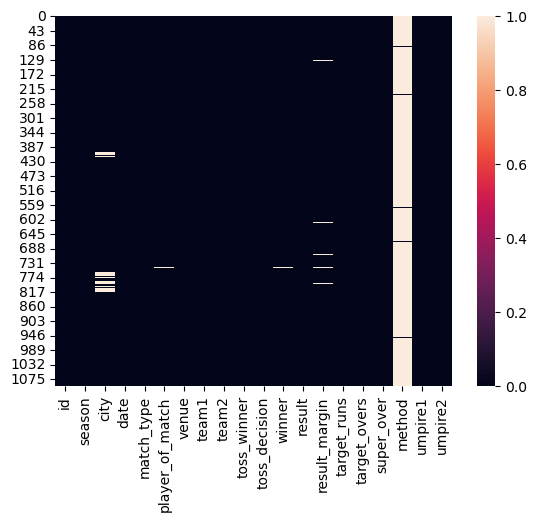

In [17]:
#heatmap
sns.heatmap(df_matches.isna())
plt.show()

In [18]:
#null values in the form of percentage 
df_matches.isna().mean().sort_values(ascending= False).round(2)*100

method             98.0
city                5.0
result_margin       2.0
player_of_match     0.0
winner              0.0
target_runs         0.0
target_overs        0.0
id                  0.0
date                0.0
season              0.0
venue               0.0
match_type          0.0
toss_decision       0.0
toss_winner         0.0
team2               0.0
team1               0.0
result              0.0
super_over          0.0
umpire1             0.0
umpire2             0.0
dtype: float64

In [19]:
#checking what are the not null values
df_matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [20]:
df_matches['method'].fillna('Normal Method',inplace=True)
print('done')

done


C:\Users\Anjali\AppData\Local\Temp\ipykernel_24468\335715209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['method'].fillna('Normal Method',inplace=True)


In [21]:
df_matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [22]:
#masking technique
df_matches[df_matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,Normal Method,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,Normal Method,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,Normal Method,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,Normal Method,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,Normal Method,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,Normal Method,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,Normal Method,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,Normal Method,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,Normal Method,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,Normal Method,Aleem Dar,VA Kulkarni


In [23]:
df_matches['city'].fillna('UAE',inplace=True) # True means actual data will also have the same changes
print('done')

done


C:\Users\Anjali\AppData\Local\Temp\ipykernel_24468\592729231.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['city'].fillna('UAE',inplace=True) # True means actual data will also have the same changes


In [24]:
df_matches.isna().mean().sort_values(ascending= False)*100

result_margin      1.735160
player_of_match    0.456621
winner             0.456621
target_runs        0.273973
target_overs       0.273973
city               0.000000
season             0.000000
id                 0.000000
date               0.000000
team1              0.000000
venue              0.000000
match_type         0.000000
toss_decision      0.000000
toss_winner        0.000000
team2              0.000000
result             0.000000
super_over         0.000000
method             0.000000
umpire1            0.000000
umpire2            0.000000
dtype: float64

In [25]:
#pyspark inspired by pandas
df_matches[df_matches['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,Normal Method,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,Normal Method,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,Normal Method,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,Normal Method,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,Normal Method,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,Normal Method,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,Normal Method,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,Normal Method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,Normal Method,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,Normal Method,AK Chaudhary,CB Gaffaney


In [26]:
df_matches['result_margin'].fillna(00.0,inplace=True)
print('done')

done


C:\Users\Anjali\AppData\Local\Temp\ipykernel_24468\3821078681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['result_margin'].fillna(00.0,inplace=True)


In [27]:
df_matches[df_matches['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2


In [28]:
df_matches.isna().mean().sort_values(ascending= False)*100

winner             0.456621
player_of_match    0.456621
target_overs       0.273973
target_runs        0.273973
date               0.000000
city               0.000000
season             0.000000
id                 0.000000
team1              0.000000
team2              0.000000
venue              0.000000
match_type         0.000000
toss_decision      0.000000
toss_winner        0.000000
result_margin      0.000000
result             0.000000
super_over         0.000000
method             0.000000
umpire1            0.000000
umpire2            0.000000
dtype: float64

In [29]:
# columns with missing values
# winners,player of the match, target overs, target runs

In [30]:
df_matches[df_matches['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,0.0,NaN,NaN,N,Normal Method,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,NaN,NaN,N,Normal Method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,0.0,188.0,20.0,N,Normal Method,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,63.0,5.0,N,Normal Method,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,0.0,NaN,NaN,N,Normal Method,AK Chaudhary,NA Patwardhan


In [31]:
df_matches['winner'].fillna('no winner',inplace=True)
print('done')

done


C:\Users\Anjali\AppData\Local\Temp\ipykernel_24468\3674686081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['winner'].fillna('no winner',inplace=True)


In [32]:
df_matches[df_matches['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2


In [33]:
# filling 2 columns at one time
# df_matches.fillna({'player_of_match': 'No Player of the match',
#                    'winner':'No winner'},inplace=True)

In [34]:
df_matches['player_of_match'].fillna('No Player of the match',inplace=True)
print('done')

done


C:\Users\Anjali\AppData\Local\Temp\ipykernel_24468\1853211015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['player_of_match'].fillna('No Player of the match',inplace=True)


In [35]:
df_matches[df_matches['player_of_match'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2


In [36]:
df_matches.fillna(0,inplace=True)
print('done')

done


In [37]:
df_matches.isna().mean().sort_values(ascending= False)*100

id                 0.0
season             0.0
city               0.0
date               0.0
match_type         0.0
player_of_match    0.0
venue              0.0
team1              0.0
team2              0.0
toss_winner        0.0
toss_decision      0.0
winner             0.0
result             0.0
result_margin      0.0
target_runs        0.0
target_overs       0.0
super_over         0.0
method             0.0
umpire1            0.0
umpire2            0.0
dtype: float64

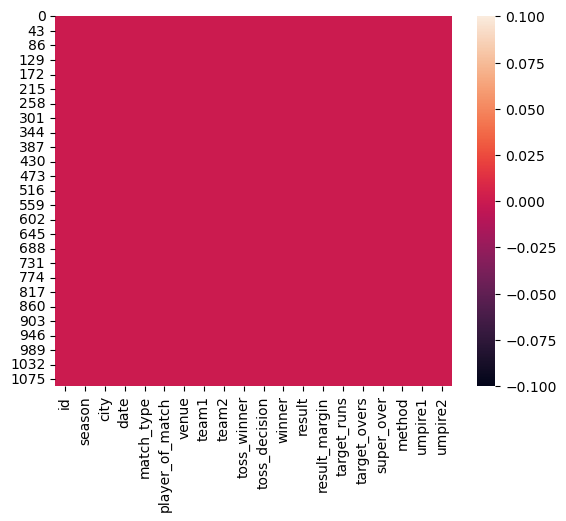

In [38]:
#heatmap
sns.heatmap(df_matches.isna())
plt.show()

In [39]:
df_matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
UAE                51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [40]:
df_matches['city'].value_counts().index

Index(['Mumbai', 'Kolkata', 'Delhi', 'Chennai', 'Hyderabad', 'Bangalore',
       'Chandigarh', 'Jaipur', 'Pune', 'UAE', 'Abu Dhabi', 'Ahmedabad',
       'Bengaluru', 'Durban', 'Visakhapatnam', 'Lucknow', 'Dubai',
       'Dharamsala', 'Centurion', 'Rajkot', 'Sharjah', 'Indore', 'Navi Mumbai',
       'Johannesburg', 'Ranchi', 'Port Elizabeth', 'Cuttack', 'Cape Town',
       'Raipur', 'Kochi', 'Mohali', 'Kanpur', 'East London', 'Kimberley',
       'Nagpur', 'Guwahati', 'Bloemfontein'],
      dtype='object', name='city')

In [41]:
data_replace = {'Navi Mumbai':'Mumbai'}
print(data_replace)

{'Navi Mumbai': 'Mumbai'}


In [42]:
df_matches.replace(data_replace, inplace= True)
print('done')

done


In [43]:
df_matches['city'].value_counts()

city
Mumbai            182
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
UAE                51
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dharamsala         13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [44]:
data_r ={'Bengaluru':'Bangalore',
         'Sharjah':'UAE',
         'Abu Dhabi':'UAE',
         'Kimberley':'Cape Town',
         'Dubai':'UAE'}
df_matches.replace(data_r, inplace = True)
print('done')

done


In [45]:
df_matches['city'].value_counts()

city
Mumbai            182
UAE               111
Bangalore          94
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Chandigarh         61
Jaipur             57
Pune               51
Ahmedabad          36
Visakhapatnam      15
Durban             15
Lucknow            14
Dharamsala         13
Centurion          12
Cape Town          10
Rajkot             10
Indore              9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
Nagpur              3
East London         3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [46]:
df_matches.duplicated('id').value_counts()

False    1095
Name: count, dtype: int64

In [47]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1095 non-null   float64
 15  target_overs     1095 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [48]:
df_matches['data']=pd.to_datetime(df_matches['date'])

In [49]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   object        
 4   match_type       1095 non-null   object        
 5   player_of_match  1095 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1095 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1095 non-null   float64       
 14  target_runs      1095 non-null   float64

In [50]:
df_matches['venue'].value_counts().index

Index(['Eden Gardens', 'Wankhede Stadium', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla', 'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Sawai Mansingh Stadium',
       'Dubai International Cricket Stadium', 'Wankhede Stadium, Mumbai',
       'Punjab Cricket Association Stadium, Mohali', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'MA Chidambaram Stadium, Chepauk, Chennai',
       'Narendra Modi Stadium, Ahmedabad',
       'Maharashtra Cricket Association Stadium',
       'Dr DY Patil Sports Academy, Mumbai', 'Dr DY Patil Sports Academy',
       'Brabourne Stadium, Mumbai', 'Subrata Roy Sahara Stadium',
       'Eden Gardens, Kolkata', 'Arun Jaitley Stadium, Delhi', 'Kingsmead',
       'M.Chinnaswamy Stadium', 'Rajiv Gandhi International Stadium',
       'Arun Jaitley Stadium',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'M Chinnaswamy Stadium, Bengaluru',
       'Rajiv Gandhi Internat

In [51]:
df_matches['venue'].str.split(',')

0                                 [M Chinnaswamy Stadium]
1           [Punjab Cricket Association Stadium,  Mohali]
2                                      [Feroz Shah Kotla]
3                                      [Wankhede Stadium]
4                                          [Eden Gardens]
                              ...                        
1090    [Rajiv Gandhi International Stadium,  Uppal,  ...
1091                  [Narendra Modi Stadium,  Ahmedabad]
1092                  [Narendra Modi Stadium,  Ahmedabad]
1093         [MA Chidambaram Stadium,  Chepauk,  Chennai]
1094         [MA Chidambaram Stadium,  Chepauk,  Chennai]
Name: venue, Length: 1095, dtype: object

In [52]:
df_matches['venue']=df_matches['venue'].apply(lambda row:row.title().split(',')[0]) # helps a rowise function to run
print('done')

done


In [53]:
df_matches['venue'].value_counts()

venue
Wankhede Stadium                                                118
Eden Gardens                                                     93
Ma Chidambaram Stadium                                           85
M Chinnaswamy Stadium                                            79
Rajiv Gandhi International Stadium                               77
Feroz Shah Kotla                                                 60
Sawai Mansingh Stadium                                           57
Dubai International Cricket Stadium                              46
Dr Dy Patil Sports Academy                                       37
Punjab Cricket Association Stadium                               35
Maharashtra Cricket Association Stadium                          35
Arun Jaitley Stadium                                             30
Sheikh Zayed Stadium                                             29
Sharjah Cricket Stadium                                          28
Brabourne Stadium                         

In [54]:
data_ven={'M.Chinnaswamy Stadium':'M Chinnaswamy Stadium',
          'Feroz Shah Kotla':'Arun Jaitley Stadium',
          'Sardar Patel Stadium':'Narendra Modi Stadium',
          'Punjab Cricket Association Is Bindra Stadium':'Punjab Cricket Association Stadium'}
df_matches['venue'].replace(data_ven, inplace = True) 
print('done')

done


C:\Users\Anjali\AppData\Local\Temp\ipykernel_24468\3160512691.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['venue'].replace(data_ven, inplace = True)


In [55]:
df_matches['venue'].value_counts()

venue
Wankhede Stadium                                                118
M Chinnaswamy Stadium                                            94
Eden Gardens                                                     93
Arun Jaitley Stadium                                             90
Ma Chidambaram Stadium                                           85
Rajiv Gandhi International Stadium                               77
Punjab Cricket Association Stadium                               61
Sawai Mansingh Stadium                                           57
Dubai International Cricket Stadium                              46
Dr Dy Patil Sports Academy                                       37
Narendra Modi Stadium                                            36
Maharashtra Cricket Association Stadium                          35
Sheikh Zayed Stadium                                             29
Sharjah Cricket Stadium                                          28
Brabourne Stadium                         

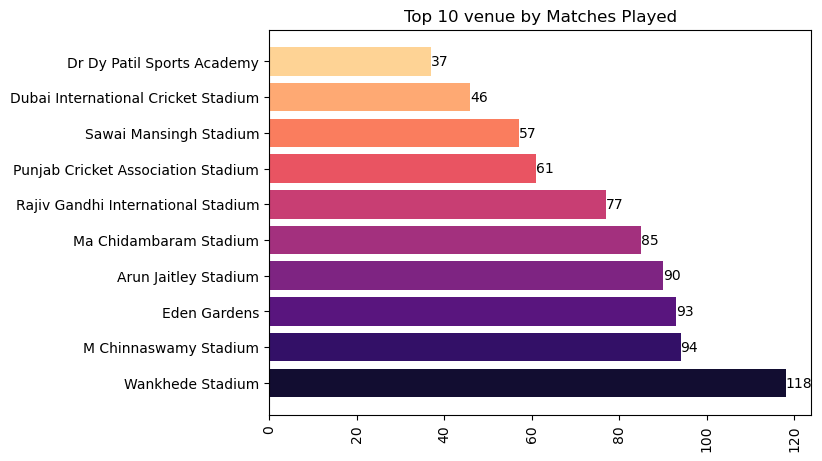

In [56]:
x=df_matches['venue'].value_counts().head(10).index
y=df_matches['venue'].value_counts().head(10).values

plt.figure(figsize=(7,5))
ax=plt.barh(x,y,color=sns.color_palette('magma',10))
plt.bar_label(ax)
plt.title('Top 10 venue by Matches Played')
plt.xticks(rotation=90)
plt.show()
        

In [57]:
print('done 1234')

done 1234


In [58]:
df_matches['team1'].value_counts().reset_index()

,team1,count
0,Royal Challengers Bangalore,135
1,Chennai Super Kings,128
2,Mumbai Indians,123
3,Kolkata Knight Riders,121
4,Rajasthan Royals,101
5,Kings XI Punjab,92
6,Sunrisers Hyderabad,86
7,Delhi Daredevils,85
8,Delhi Capitals,41
9,Deccan Chargers,39


In [59]:
#to ignore warnings in python 
import warnings
warnings.filterwarnings('ignore')

data_team={'Delhi Daredevils':'Delhi Capitals',
          'Royal Challengers Bangalore':'Royal Challengers Bengaluru',
           'Kings XI Punjab':'Punjab Kings',
           'Rising Pune Supergiant':'Rising Pune Supergiants',
           'Pune Warriors':'Rising Pune Supergiants'
          }
df_matches[['team1','team2']]=df_matches[['team1','team2']].replace(data_team)
print('done')

done


In [61]:
df_matches['team1'].value_counts()

team1
Royal Challengers Bengaluru    144
Chennai Super Kings            128
Delhi Capitals                 126
Punjab Kings                   123
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Sunrisers Hyderabad             86
Deccan Chargers                 39
Rising Pune Supergiants         37
Lucknow Super Giants            23
Gujarat Titans                  21
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [62]:
df_matches.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,data
1004,1359529,2023,Chennai,2023-05-10,League,RA Jadeja,Ma Chidambaram Stadium,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,...,Chennai Super Kings,runs,27.0,168.0,20.0,N,Normal Method,CB Gaffaney,NA Patwardhan,2023-05-10
308,548368,2012,Kolkata,2012-05-14,League,MEK Hussey,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,wickets,5.0,159.0,20.0,N,Normal Method,JD Cloete,SJA Taufel,2012-05-14
311,548371,2012,Dharamsala,2012-05-17,League,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Punjab Kings,Chennai Super Kings,Kings XI Punjab,...,Kings XI Punjab,wickets,6.0,121.0,20.0,N,Normal Method,VA Kulkarni,SK Tarapore,2012-05-17
899,1304070,2022,Mumbai,2022-04-14,League,HH Pandya,Dr Dy Patil Sports Academy,Gujarat Titans,Rajasthan Royals,Rajasthan Royals,...,Gujarat Titans,runs,37.0,193.0,20.0,N,Normal Method,CB Gaffaney,R Pandit,2022-04-14
180,501203,2011,Kolkata,2011-04-11,League,JH Kallis,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,...,Kolkata Knight Riders,runs,9.0,164.0,20.0,N,Normal Method,RE Koertzen,SK Tarapore,2011-04-11


In [63]:
df_matches[['toss_winner','winner']].replace(data_team, inplace = True)
print('done')

done


In [64]:
df_matches.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,data
331,598048,2013,Bangalore,2013-04-09,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Sunrisers Hyderabad,Sunrisers Hyderabad,...,Royal Challengers Bangalore,wickets,7.0,162.0,20.0,N,Normal Method,S Ravi,SJA Taufel,2013-04-09
290,548351,2012,Pune,2012-05-03,League,SL Malinga,Subrata Roy Sahara Stadium,Rising Pune Supergiants,Mumbai Indians,Mumbai Indians,...,Mumbai Indians,runs,1.0,121.0,20.0,N,Normal Method,Asad Rauf,S Asnani,2012-05-03
22,336004,2007/08,Mumbai,2008-05-04,League,SM Pollock,Dr Dy Patil Sports Academy,Mumbai Indians,Delhi Capitals,Delhi Daredevils,...,Mumbai Indians,runs,29.0,163.0,20.0,N,Normal Method,IL Howell,RE Koertzen,2008-05-04
452,734039,2014,Chandigarh,2014-05-25,League,M Vohra,Punjab Cricket Association Stadium,Punjab Kings,Delhi Capitals,Kings XI Punjab,...,Kings XI Punjab,wickets,7.0,116.0,20.0,N,Normal Method,HDPK Dharmasena,VA Kulkarni,2014-05-25
728,1178408,2019,Hyderabad,2019-04-17,League,DA Warner,Rajiv Gandhi International Stadium,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,...,Sunrisers Hyderabad,wickets,6.0,133.0,20.0,N,Normal Method,IJ Gould,UV Gandhe,2019-04-17


In [65]:
#umpire1 and Umpire2 

In [66]:
df_matches.drop(['umpire1','umpire2'],axis=1,inplace= True)
print('done')

done


In [67]:
df_matches.sample(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,data
631,1082646,2017,Delhi,2017-05-14,League,HV Patel,Arun Jaitley Stadium,Delhi Capitals,Royal Challengers Bengaluru,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,10.0,162.0,20.0,N,Normal Method,2017-05-14
326,598002,2013,Chennai,2013-04-06,League,KA Pollard,Ma Chidambaram Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,149.0,20.0,N,Normal Method,2013-04-06


In [70]:
df_matches['toss_winner'].replace(data_team, inplace = True)
df_matches['winner'].replace(data_team, inplace = True)

In [71]:
df_matches['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 143
Delhi Capitals                 130
Kolkata Knight Riders          122
Chennai Super Kings            122
Royal Challengers Bengaluru    121
Rajasthan Royals               120
Punjab Kings                   109
Sunrisers Hyderabad             88
Deccan Chargers                 43
Rising Pune Supergiants         33
Gujarat Titans                  22
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Name: count, dtype: int64

In [72]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'data'],
      dtype='object')

In [73]:
df_matches.shape

(1095, 19)

In [74]:
df_matches['winner'].value_counts()

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Delhi Capitals                 115
Punjab Kings                   112
Rajasthan Royals               112
Sunrisers Hyderabad             88
Deccan Chargers                 29
Gujarat Titans                  28
Rising Pune Supergiants         27
Lucknow Super Giants            24
Gujarat Lions                   13
Kochi Tuskers Kerala             6
no winner                        5
Name: count, dtype: int64

In [79]:
df_matches[df_matches['match_type'] == 'Final']['winner'].value_counts()

winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Gujarat Titans           1
Name: count, dtype: int64

<Axes: title={'center': 'Highest IPL Session Winning Team'}, ylabel='count'>

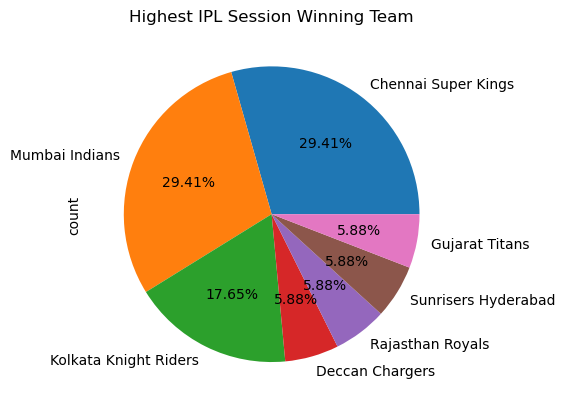

In [80]:
plt.title('Highest IPL Session Winning Team')
df_matches[df_matches['match_type'] == 'Final']['winner'].value_counts().plot(kind= 'pie', autopct='%.2f%%')

In [81]:
df_matches['date']

0       2008-04-18
1       2008-04-19
2       2008-04-19
3       2008-04-20
4       2008-04-20
           ...    
1090    2024-05-19
1091    2024-05-21
1092    2024-05-22
1093    2024-05-24
1094    2024-05-26
Name: date, Length: 1095, dtype: object

In [85]:
df_matches['date']=pd.to_datetime(df_matches['date'])
print('done')

done


In [86]:
df_matches['date'].dt.year

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
1090    2024
1091    2024
1092    2024
1093    2024
1094    2024
Name: date, Length: 1095, dtype: int32

In [87]:
final_match=df_matches[df_matches['match_type']=='Final']
final_match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,data
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr Dy Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,164.0,20.0,N,Normal Method,2008-06-01
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bengaluru,Deccan Chargers,Royal Challengers Bengaluru,field,Deccan Chargers,runs,6.0,144.0,20.0,N,Normal Method,2009-05-24
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr Dy Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,169.0,20.0,N,Normal Method,2010-04-25
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,Ma Chidambaram Stadium,Chennai Super Kings,Royal Challengers Bengaluru,Chennai Super Kings,bat,Chennai Super Kings,runs,58.0,206.0,20.0,N,Normal Method,2011-05-28
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,Ma Chidambaram Stadium,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,Normal Method,2012-05-27
397,598073,2013,Kolkata,2013-05-26,Final,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,23.0,149.0,20.0,N,Normal Method,2013-05-26
457,734049,2014,Bangalore,2014-06-01,Final,MK Pandey,M Chinnaswamy Stadium,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,200.0,20.0,N,Normal Method,2014-06-01
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,41.0,203.0,20.0,N,Normal Method,2015-05-24
576,981019,2016,Bangalore,2016-05-29,Final,BCJ Cutting,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,209.0,20.0,N,Normal Method,2016-05-29
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,Rajiv Gandhi International Stadium,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,130.0,20.0,N,Normal Method,2017-05-21


In [88]:
final_match['Winning Year'] = final_match['date'].dt.year
print('done')

done


In [89]:
final_match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,data,Winning Year
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr Dy Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,164.0,20.0,N,Normal Method,2008-06-01,2008
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bengaluru,Deccan Chargers,Royal Challengers Bengaluru,field,Deccan Chargers,runs,6.0,144.0,20.0,N,Normal Method,2009-05-24,2009
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr Dy Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,169.0,20.0,N,Normal Method,2010-04-25,2010
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,Ma Chidambaram Stadium,Chennai Super Kings,Royal Challengers Bengaluru,Chennai Super Kings,bat,Chennai Super Kings,runs,58.0,206.0,20.0,N,Normal Method,2011-05-28,2011
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,Ma Chidambaram Stadium,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,Normal Method,2012-05-27,2012
397,598073,2013,Kolkata,2013-05-26,Final,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,23.0,149.0,20.0,N,Normal Method,2013-05-26,2013
457,734049,2014,Bangalore,2014-06-01,Final,MK Pandey,M Chinnaswamy Stadium,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,200.0,20.0,N,Normal Method,2014-06-01,2014
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,41.0,203.0,20.0,N,Normal Method,2015-05-24,2015
576,981019,2016,Bangalore,2016-05-29,Final,BCJ Cutting,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,209.0,20.0,N,Normal Method,2016-05-29,2016
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,Rajiv Gandhi International Stadium,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,130.0,20.0,N,Normal Method,2017-05-21,2017


In [90]:
final_match[['Winning Year','winner']].sort_values('winner')

,Winning Year,winner
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
1023,2023,Chennai Super Kings
695,2018,Chennai Super Kings
875,2021,Chennai Super Kings
114,2009,Deccan Chargers
949,2022,Gujarat Titans
1094,2024,Kolkata Knight Riders
321,2012,Kolkata Knight Riders
457,2014,Kolkata Knight Riders


In [123]:
df_matches[['venue','result']].value_counts().reset_index()

,venue,result,count
0,Wankhede Stadium,wickets,64
1,Eden Gardens,wickets,53
2,Wankhede Stadium,runs,53
3,M Chinnaswamy Stadium,wickets,49
4,Ma Chidambaram Stadium,runs,47
...,...,...,...
83,Rajiv Gandhi International Stadium,tie,1
84,Saurashtra Cricket Association Stadium,tie,1
85,Outsurance Oval,wickets,1
86,Vidarbha Cricket Association Stadium,wickets,1


In [110]:
df_matches.groupby('venue')['result'].value_counts()

venue                  result   
Arun Jaitley Stadium   runs         44
                       wickets      44
                       no result     1
                       tie           1
Barabati Stadium       runs          4
                                    ..
Wankhede Stadium       wickets      64
                       runs         53
                       tie           1
Zayed Cricket Stadium  wickets       5
                       runs          3
Name: count, Length: 88, dtype: int64

In [116]:
final_match.groupby('venue')['result'].value_counts().reset_index().sort_values(by= 'count',ascending= False)

,venue,result,count
4,Eden Gardens,runs,2
9,Narendra Modi Stadium,wickets,2
11,Rajiv Gandhi International Stadium,runs,2
7,Ma Chidambaram Stadium,wickets,2
0,Dr Dy Patil Sports Academy,runs,1
3,Dubai International Cricket Stadium,wickets,1
2,Dubai International Cricket Stadium,runs,1
1,Dr Dy Patil Sports Academy,wickets,1
5,M Chinnaswamy Stadium,runs,1
8,Ma Chidambaram Stadium,runs,1


In [121]:
df_matches.groupby('venue')['result'].value_counts().reset_index().sort_values(by= 'count',ascending= False)

,venue,result,count
83,Wankhede Stadium,wickets,64
24,Eden Gardens,wickets,53
84,Wankhede Stadium,runs,53
35,M Chinnaswamy Stadium,wickets,49
39,Ma Chidambaram Stadium,runs,47
...,...,...,...
62,Rajiv Gandhi International Stadium,tie,1
65,Saurashtra Cricket Association Stadium,tie,1
57,Outsurance Oval,wickets,1
82,Vidarbha Cricket Association Stadium,wickets,1


In [124]:
# Q1. All season winner 

In [125]:
final_match[['Winning Year','winner']].sort_values('Winning Year')

,Winning Year,winner
57,2008,Rajasthan Royals
114,2009,Deccan Chargers
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


In [126]:
# Q2. Top 10 match winner team

In [128]:
df_matches['winner'].value_counts().head(10)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Delhi Capitals                 115
Punjab Kings                   112
Rajasthan Royals               112
Sunrisers Hyderabad             88
Deccan Chargers                 29
Gujarat Titans                  28
Name: count, dtype: int64

In [129]:
# univariate analysis
# numerical categorical

In [132]:
num_cols=df_matches.describe().columns
cat_cols=df_matches.describe(include='O').columns

In [133]:
print(num_cols)

Index(['id', 'date', 'result_margin', 'target_runs', 'target_overs', 'data'], dtype='object')


In [134]:
print(cat_cols)

Index(['season', 'city', 'match_type', 'player_of_match', 'venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'super_over', 'method'],
      dtype='object')


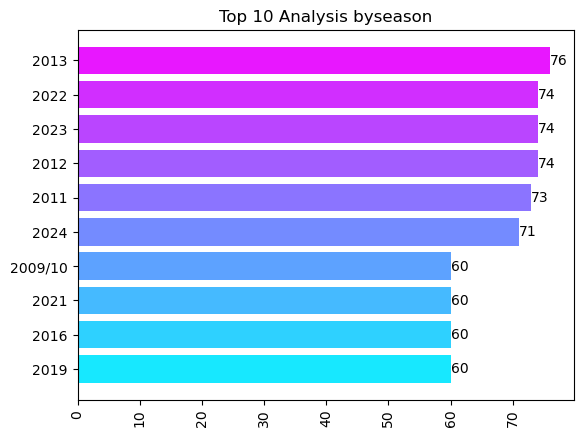

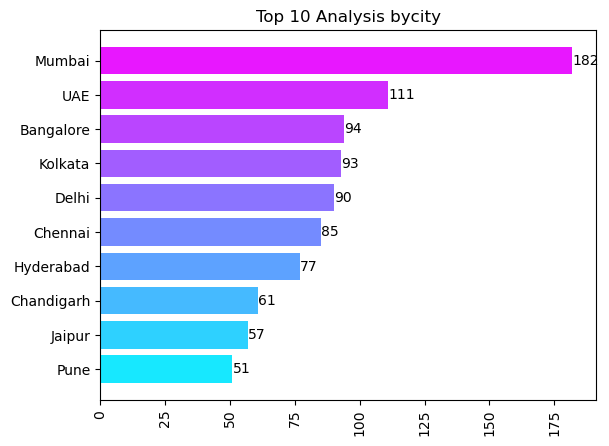

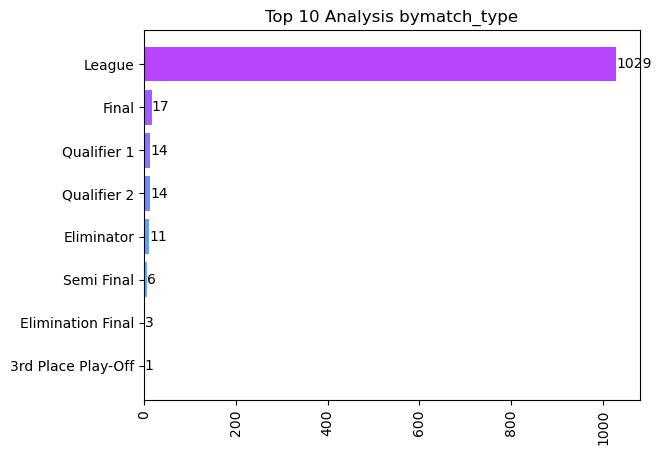

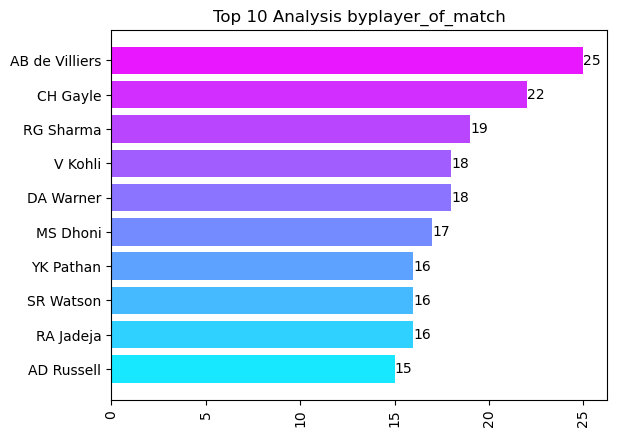

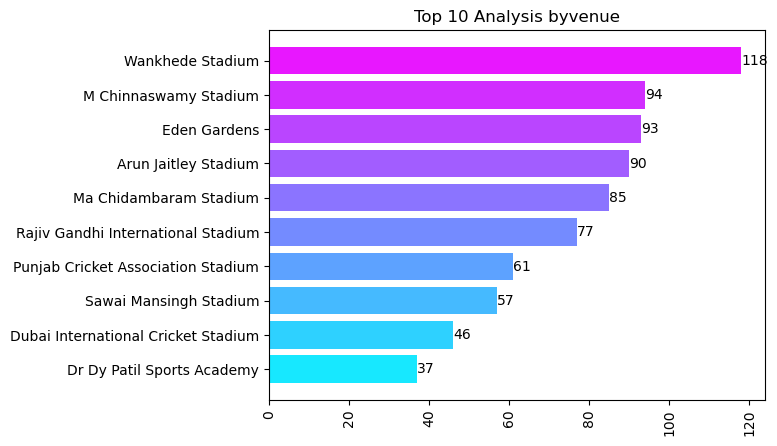

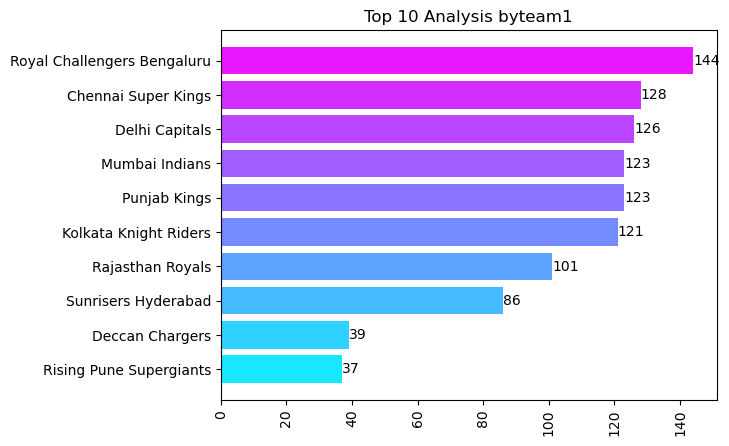

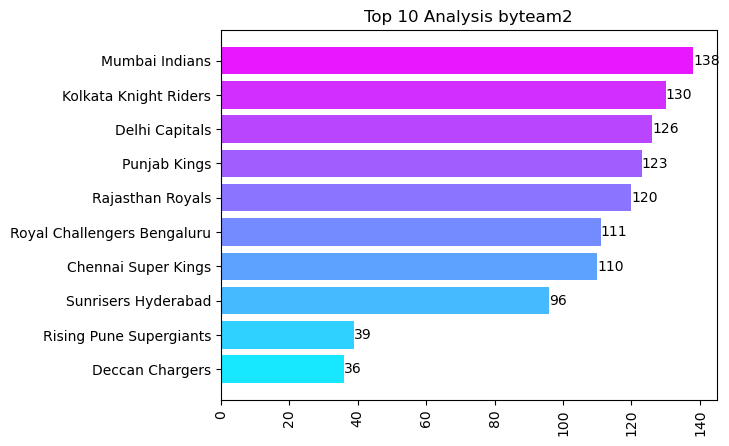

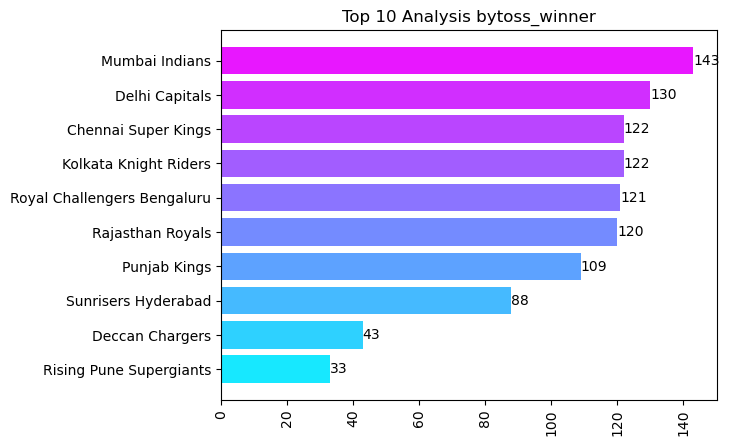

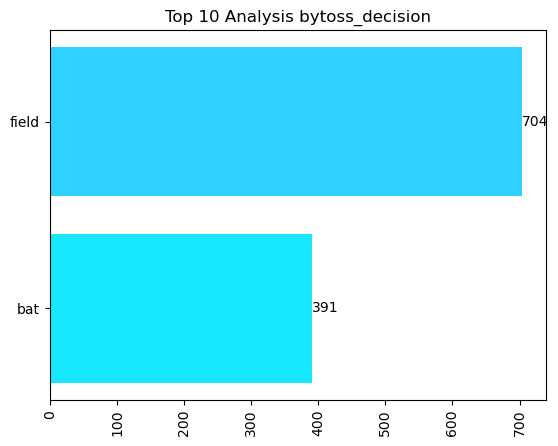

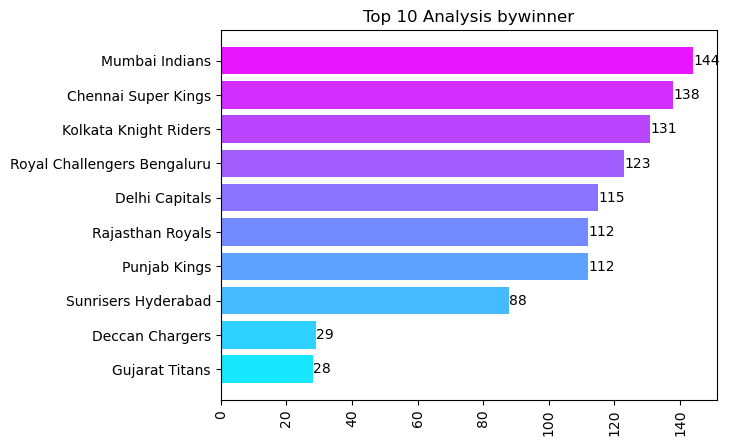

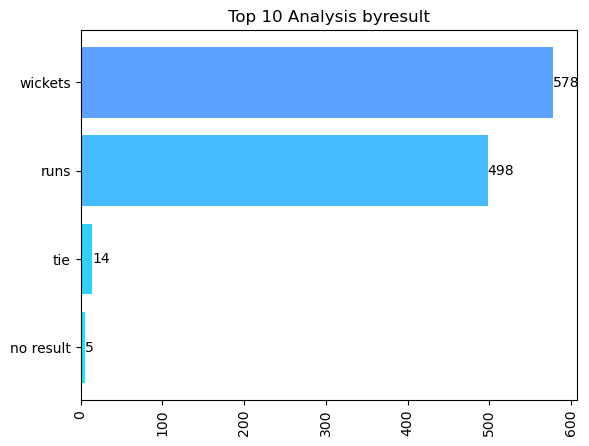

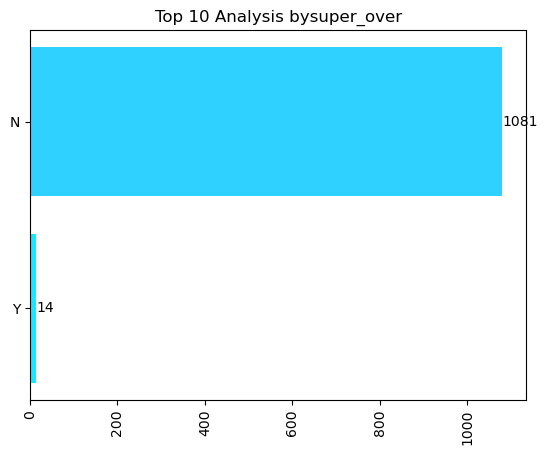

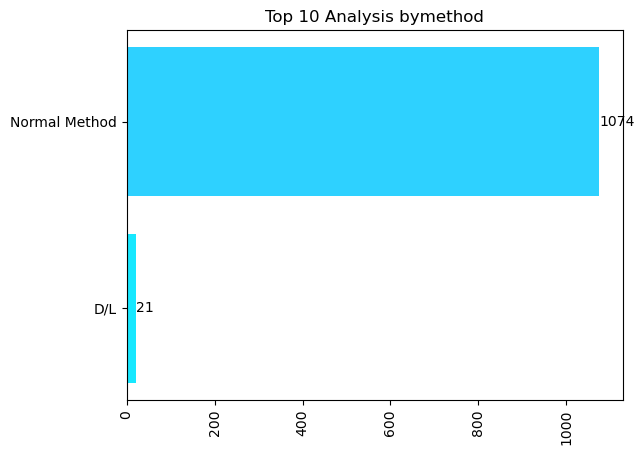

In [139]:
for i in cat_cols:
    try:
        temp_df=df_matches[i].value_counts().head(10).sort_values(ascending= True)
        x= temp_df.index
        y=temp_df.values
        plt.title(f'Top 10 Analysis by{i}')
        ax=plt.barh(x,y,color=sns.color_palette('cool',10))
        plt.bar_label(ax)
        plt.xticks(rotation=90)
        plt.show()
    except:
        pass

In [140]:
# SUB PLOT

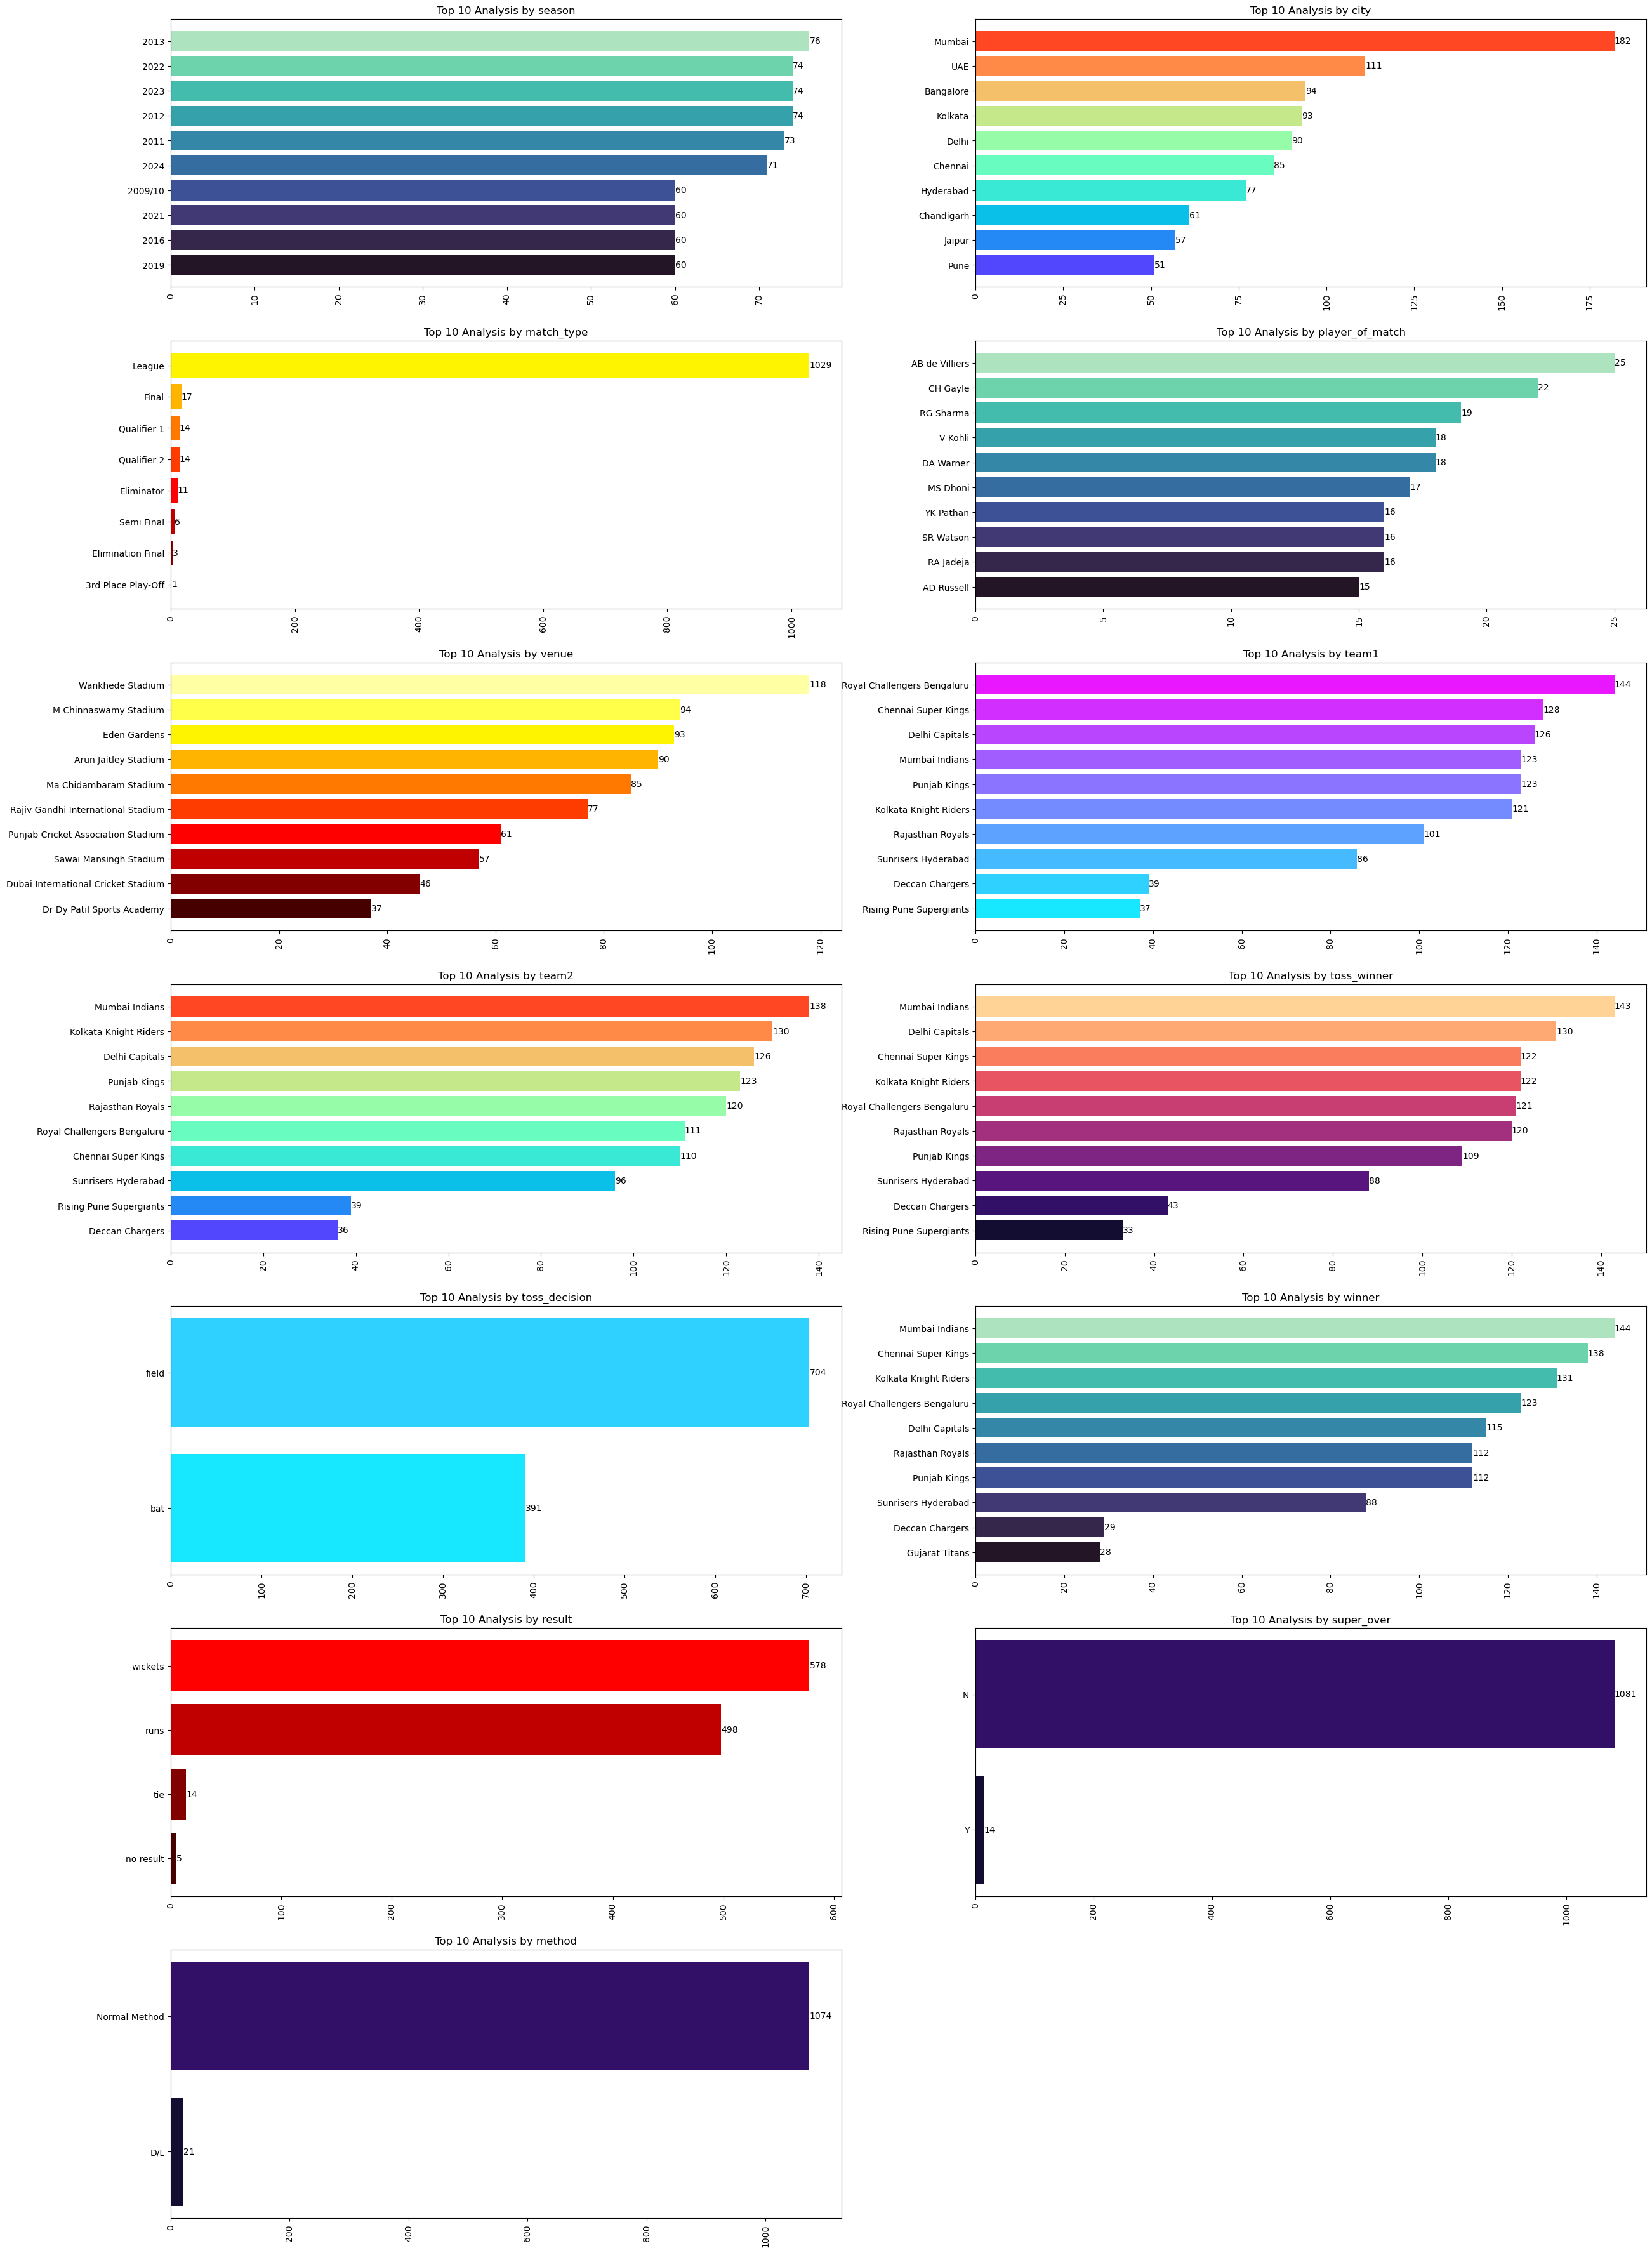

Done


In [160]:
plt.figure(figsize=(30,45))
for j,i in enumerate(cat_cols):
        temp_df=df_matches[i].value_counts().head(10).sort_values(ascending= True)
        x= temp_df.index
        y=temp_df.values
        plt.subplot(7,2,j+1) #
        plt.title(f'Top 10 Analysis by {i}')
        colors=['cool','magma','mako','rainbow','hot']
        import random
        ax=plt.barh(x,y,color=sns.color_palette(random.choice(colors),10))
        plt.bar_label(ax)
        plt.xticks(rotation=90)
plt.savefig('All_Categorical_Analysis_report.jpeg')  # dpi is used to improve pixel quality      
plt.show()
print('Done')

In [161]:
# top 10 target runs
# maximum result margin wins 
# top 5 result margin wins 
# season player of the match

In [162]:
num_cols

Index(['id', 'date', 'result_margin', 'target_runs', 'target_overs', 'data'], dtype='object')

In [164]:
num_cols=df_matches.describe().columns
num_cols= list(num_cols)
num_cols.remove('id')
num_cols.remove('date')
num_cols.remove('target_overs')
num_cols.remove('data')

num_cols

['result_margin', 'target_runs']

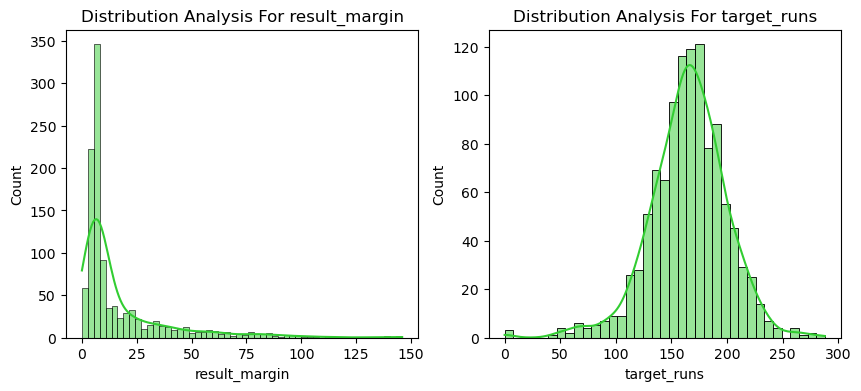

In [180]:
# Numerical Histogram
plt.figure(figsize=(10,4))
for j,i in enumerate(num_cols):
    plt.subplot(1,2,j+1)
    plt.title(f'Distribution Analysis For {i}')
    sns.histplot(df_matches[i],color='limegreen',kde= True) #kernel density estimator(KDE)

plt.show()

In [181]:
# max tagreted runs

In [183]:
df_matches[df_matches['target_runs']==df_matches['target_runs'].max()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,data
1053,1426268,2024,Bangalore,2024-04-15,League,TM Head,M Chinnaswamy Stadium,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,Sunrisers Hyderabad,runs,25.0,288.0,20.0,N,Normal Method,2024-04-15


In [184]:
# Min target runs which team?

In [185]:
df_matches[df_matches['target_runs']==df_matches['target_runs'].min()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,data
241,501265,2011,Delhi,2011-05-21,League,No Player of the match,Arun Jaitley Stadium,Delhi Capitals,Rising Pune Supergiants,Delhi Capitals,bat,no winner,no result,0.0,0.0,0.0,N,Normal Method,2011-05-21
485,829763,2015,Bangalore,2015-04-29,League,No Player of the match,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,no winner,no result,0.0,0.0,0.0,N,Normal Method,2015-04-29
994,1359519,2023,Lucknow,2023-05-03,League,No Player of the match,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,no winner,no result,0.0,0.0,0.0,N,Normal Method,2023-05-03


In [ ]:
#lowest run winner
temp_df= df_matches[df_matches['winner'] != 'no winner']
temp_df[temp_df['target_runs'] == temp_df['target_runs'].min()]

In [191]:
# normal method lowest run winner
temp_df= df_matches[(df_matches['winner'] != 'no winner') & (df_matches['method'] == 'Normal Method')]
temp_df[temp_df['target_runs'] == temp_df['target_runs'].min()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,data
37,336021,2007/08,Mumbai,2008-05-16,League,SM Pollock,Wankhede Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,8.0,68.0,20.0,N,Normal Method,2008-05-16
611,1082626,2017,Chandigarh,2017-04-30,League,Sandeep Sharma,Punjab Cricket Association Stadium,Punjab Kings,Delhi Capitals,Punjab Kings,field,Punjab Kings,wickets,10.0,68.0,20.0,N,Normal Method,2017-04-30


In [192]:


df_matches['target_runs'].value_counts().sort_index().head(20)

target_runs
0.0     3
43.0    1
48.0    1
52.0    1
53.0    1
54.0    1
58.0    1
61.0    1
63.0    1
66.0    1
68.0    2
69.0    2
71.0    3
74.0    1
81.0    2
82.0    1
83.0    1
85.0    1
89.0    2
90.0    1
Name: count, dtype: int64

In [195]:
df_matches[df_matches['date'].dt.year == 2017].sort_values(by= 'winner')[['winner','result','result_margin']]

,winner,result,result_margin
617,Delhi Capitals,wickets,7.0
615,Delhi Capitals,wickets,6.0
591,Delhi Capitals,runs,51.0
627,Delhi Capitals,runs,7.0
625,Delhi Capitals,wickets,2.0
585,Delhi Capitals,runs,97.0
589,Gujarat Lions,wickets,7.0
599,Gujarat Lions,wickets,4.0
606,Gujarat Lions,wickets,7.0
622,Gujarat Lions,wickets,6.0


In [196]:
# LOC
# label based searching 
#ILOC
# index based searching 

In [197]:
df_matches.iloc[603,:]

id                                     1082617
season                                    2017
city                                   Kolkata
date                       2017-04-23 00:00:00
match_type                              League
player_of_match                NM Coulter-Nile
venue                             Eden Gardens
team1                    Kolkata Knight Riders
team2              Royal Challengers Bengaluru
toss_winner        Royal Challengers Bengaluru
toss_decision                            field
winner                   Kolkata Knight Riders
result                                    runs
result_margin                             82.0
target_runs                              132.0
target_overs                              20.0
super_over                                   N
method                           Normal Method
data                       2017-04-23 00:00:00
Name: 603, dtype: object

In [199]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'data'],
      dtype='object')

In [200]:
# Q1. highest score of a team in a particular stadium

In [201]:
df_matches.groupby(['venue','team1'])['target_runs'].max()

venue                  team1                      
Arun Jaitley Stadium   Chennai Super Kings            224.0
                       Delhi Capitals                 258.0
                       Gujarat Lions                  163.0
                       Kolkata Knight Riders          186.0
                       Mumbai Indians                 169.0
                                                      ...  
Zayed Cricket Stadium  Kolkata Knight Riders          172.0
                       Mumbai Indians                 236.0
                       Punjab Kings                   136.0
                       Royal Challengers Bengaluru     93.0
                       Sunrisers Hyderabad            142.0
Name: target_runs, Length: 211, dtype: float64

In [202]:
df_matches.groupby(['venue','team2'])['target_runs'].max()

venue                  team2                      
Arun Jaitley Stadium   Chennai Super Kings            188.0
                       Deccan Chargers                195.0
                       Delhi Capitals                 267.0
                       Gujarat Lions                  209.0
                       Gujarat Titans                 225.0
                                                      ...  
Zayed Cricket Stadium  Kolkata Knight Riders          156.0
                       Mumbai Indians                 136.0
                       Rajasthan Royals               190.0
                       Royal Challengers Bengaluru    142.0
                       Sunrisers Hyderabad            236.0
Name: target_runs, Length: 289, dtype: float64

In [203]:
# lowest score by a team
df_matches.groupby(['venue','team1'])['target_runs'].min()

venue                  team1                      
Arun Jaitley Stadium   Chennai Super Kings            193.0
                       Delhi Capitals                   0.0
                       Gujarat Lions                  163.0
                       Kolkata Knight Riders          128.0
                       Mumbai Indians                 169.0
                                                      ...  
Zayed Cricket Stadium  Kolkata Knight Riders          172.0
                       Mumbai Indians                 156.0
                       Punjab Kings                   136.0
                       Royal Challengers Bengaluru     93.0
                       Sunrisers Hyderabad            142.0
Name: target_runs, Length: 211, dtype: float64

In [204]:
df_matches.groupby(['venue','team1'])['target_runs'].agg(['max','min','mean'])

max    min        mean
venue                 team1                                                
Arun Jaitley Stadium  Chennai Super Kings          224.0  193.0  212.000000
                      Delhi Capitals               258.0    0.0  164.971831
                      Gujarat Lions                163.0  163.0  163.000000
                      Kolkata Knight Riders        186.0  128.0  157.000000
                      Mumbai Indians               169.0  169.0  169.000000
...                                                  ...    ...         ...
Zayed Cricket Stadium Kolkata Knight Riders        172.0  172.0  172.000000
                      Mumbai Indians               236.0  156.0  196.000000
                      Punjab Kings                 136.0  136.0  136.000000
                      Royal Challengers Bengaluru   93.0   93.0   93.000000
                      Sunrisers Hyderabad          142.0  142.0  142.000000

[211 rows x 3 columns]

In [205]:
#PIVOT TABLE
#new column = YEAR
df_matches['year']=df_matches['date'].dt.year
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'data', 'year'],
      dtype='object')

In [214]:
df_matches.pivot_table(index= 'year',columns= 'team1',values='target_runs')

team1,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Gujarat Lions,Gujarat Titans,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Punjab Kings,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bengaluru,Sunrisers Hyderabad
year,,,,,,,,,,,,,,
2008,163.333333,174.428571,166.285714,NaN,NaN,NaN,127.000000,NaN,143.285714,186.285714,159.428571,NaN,157.142857,NaN
2009,164.727273,151.400000,131.777778,NaN,NaN,NaN,147.500000,NaN,146.000000,135.833333,NaN,NaN,151.187500,NaN
2010,164.900000,161.285714,173.571429,NaN,NaN,NaN,161.857143,NaN,174.666667,173.714286,156.857143,NaN,162.111111,NaN
2011,166.375000,162.285714,135.428571,NaN,NaN,145.571429,128.428571,NaN,153.000000,181.714286,143.571429,144.142857,156.000000,NaN
2012,154.666667,158.250000,171.600000,NaN,NaN,NaN,155.000000,NaN,142.875000,150.750000,168.375000,150.750000,173.714286,NaN
2013,172.000000,NaN,152.500000,NaN,NaN,NaN,145.000000,NaN,176.333333,165.875000,152.888889,144.750000,161.375000,135.625000
2014,172.222222,NaN,139.000000,NaN,NaN,NaN,163.375000,NaN,173.714286,164.750000,155.857143,NaN,165.000000,161.857143
2015,164.777778,NaN,146.000000,NaN,NaN,NaN,172.833333,NaN,184.000000,149.571429,176.714286,NaN,158.375000,141.142857
2016,NaN,NaN,156.857143,156.222222,NaN,NaN,147.571429,NaN,160.285714,168.857143,NaN,153.142857,201.375000,140.375000


In [221]:
all_team_year_df=df_matches.pivot_table(index= 'year',columns= 'team1',values='target_runs',aggfunc='min')
all_team_year_df= all_team_year_df.round(0)

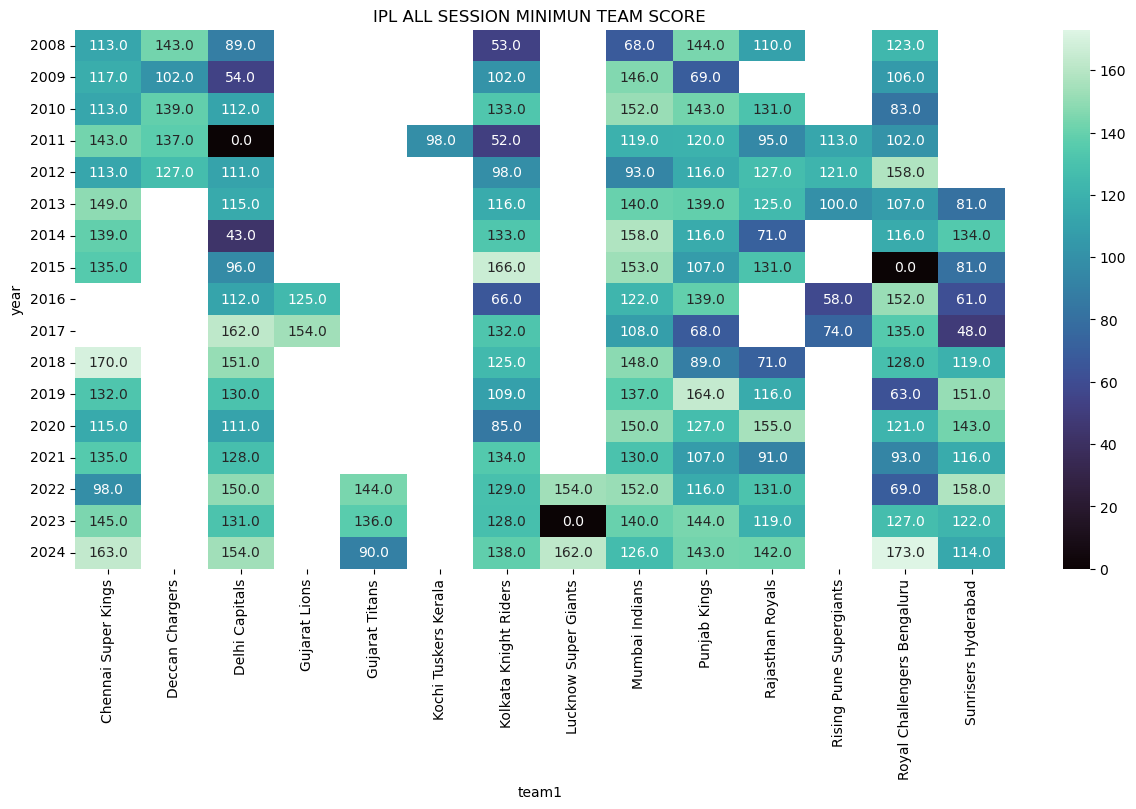

In [224]:
plt.figure(figsize=(15,7))
# pd.options.display.float_format= '{:.2f}'.format
sns.heatmap(all_team_year_df,fmt="",annot= True,cmap='mako')
plt.title('IPL ALL SESSION MINIMUN TEAM SCORE')
plt.show()

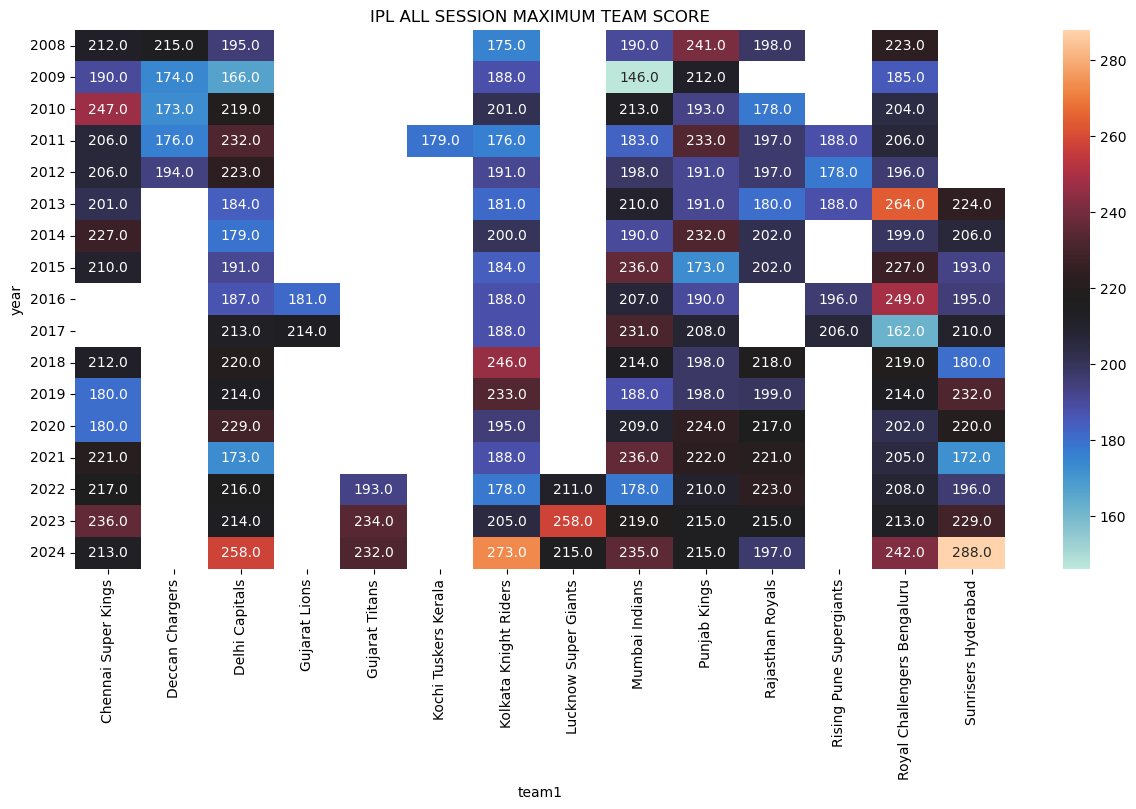

In [226]:
all_team_year_df=df_matches.pivot_table(index= 'year',columns= 'team1',values='target_runs',aggfunc='max')
all_team_year_df= all_team_year_df.round(0)
plt.figure(figsize=(15,7))
# pd.options.display.float_format= '{:.2f}'.format
sns.heatmap(all_team_year_df,fmt="",annot= True,cmap='icefire')
plt.title('IPL ALL SESSION MAXIMUM TEAM SCORE')
plt.show()

In [227]:
#team 2 analysis : work assessment 

In [228]:
# most asked question in interview
# loc vs iloc 
# loc: location name is given (range can also be given )
# iloc: index is passed (multiple, range)

In [229]:
df_matches.loc[50:55,['team1','team2','result']] # use of loc

,team1,team2,result
50,Kolkata Knight Riders,Punjab Kings,wickets
51,Rajasthan Royals,Mumbai Indians,wickets
52,Deccan Chargers,Chennai Super Kings,wickets
53,Royal Challengers Bengaluru,Mumbai Indians,wickets
54,Punjab Kings,Rajasthan Royals,runs
55,Delhi Capitals,Rajasthan Royals,runs


In [231]:
df_matches.iloc[50:55,[7,8,12]]  # use of iloc

,team1,team2,result
50,Kolkata Knight Riders,Punjab Kings,wickets
51,Rajasthan Royals,Mumbai Indians,wickets
52,Deccan Chargers,Chennai Super Kings,wickets
53,Royal Challengers Bengaluru,Mumbai Indians,wickets
54,Punjab Kings,Rajasthan Royals,runs


In [232]:
# 2016> all rows and columns last 3

In [234]:
rows= df_matches[df_matches['year']>=2016].index
df_matches.iloc[rows,-3:]

,method,data,year
517,Normal Method,2016-04-09,2016
518,Normal Method,2016-04-10,2016
519,Normal Method,2016-04-11,2016
520,Normal Method,2016-04-12,2016
521,Normal Method,2016-04-13,2016
...,...,...,...
1090,Normal Method,2024-05-19,2024
1091,Normal Method,2024-05-21,2024
1092,Normal Method,2024-05-22,2024
1093,Normal Method,2024-05-24,2024


In [239]:
df_delivers.iloc[123257,:]

match_id                                 980907
inning                                        1
batting_team        Royal Challengers Bangalore
bowling_team                Sunrisers Hyderabad
over                                         16
ball                                          6
batter                                SR Watson
bowler                                KV Sharma
non_striker                      AB de Villiers
batsman_runs                                  6
extra_runs                                    0
total_runs                                    6
extras_type                                 NaN
is_wicket                                     0
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                     NaN
Name: 123257, dtype: object

In [240]:
df_delivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [242]:
df_delivers.isna().sum().sort_values(ascending = False)

fielder             251566
dismissal_kind      247970
player_dismissed    247970
extras_type         246795
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
non_striker              0
bowler                   0
batter                   0
ball                     0
total_runs               0
extra_runs               0
batsman_runs             0
is_wicket                0
dtype: int64

In [243]:
df_delivers.loc[:,['fielder','dismissal_kind','player_dismissed','extras_type']]

,fielder,dismissal_kind,player_dismissed,extras_type
0,NaN,NaN,NaN,legbyes
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,wides
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
260915,NaN,NaN,NaN,NaN
260916,NaN,NaN,NaN,NaN
260917,NaN,NaN,NaN,NaN
260918,NaN,NaN,NaN,NaN


In [244]:
normal_cols=['fielder','dismissal_kind','player_dismissed','extras_type']

In [245]:
for i in normal_cols:
    print(f'Analysis for {i} \n\n')
    display(df_delivers[i].value_counts().head(10))

Analysis for fielder 




fielder
MS Dhoni          220
KD Karthik        199
AB de Villiers    141
RV Uthappa        133
V Kohli           131
WP Saha           131
SK Raina          119
RA Jadeja         116
SV Samson         115
RG Sharma         111
Name: count, dtype: int64

Analysis for dismissal_kind 




dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

Analysis for player_dismissed 




player_dismissed
RG Sharma     223
V Kohli       207
S Dhawan      193
KD Karthik    184
RV Uthappa    180
SK Raina      171
DA Warner     164
AT Rayudu     155
AM Rahane     154
SV Samson     144
Name: count, dtype: int64

Analysis for extras_type 




extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

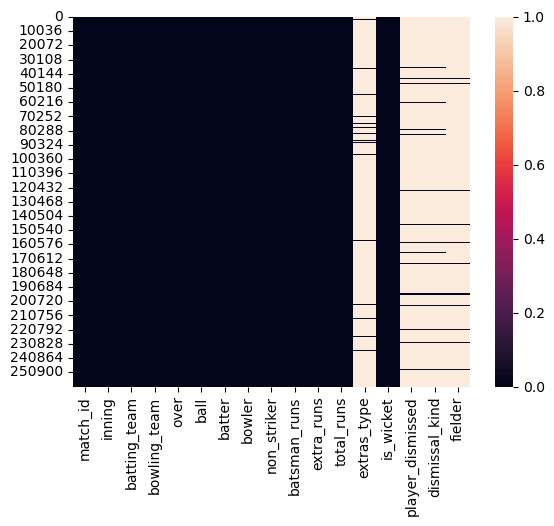

In [246]:
plt.title(' CHecking Null Value Distribution')
sns.heatmap(df_delivers.isna())
plt.show()

In [247]:
# fill NAN values
df_delivers.fillna('unknown',inplace = True)
print('done')

done


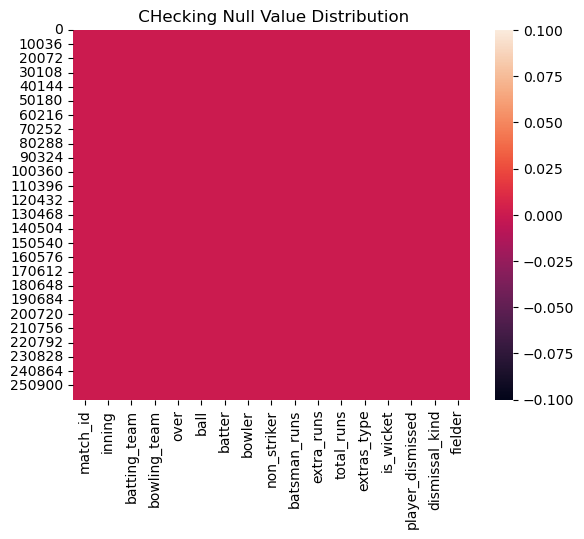

In [248]:
plt.title(' CHecking Null Value Distribution')
sns.heatmap(df_delivers.isna())
plt.show()

In [249]:
df_delivers.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
179792,1216495,1,Mumbai Indians,Sunrisers Hyderabad,4,6,Ishan Kishan,Sandeep Sharma,SA Yadav,0,0,0,unknown,0,unknown,unknown,unknown


In [258]:
player_df = df_delivers[df_delivers['batter'] == 'V Kohli']
player_df['batsman_runs'].value_counts()

batsman_runs
1    2591
0    2198
4     708
2     445
6     273
3      21
Name: count, dtype: int64

In [280]:
def get_player_performance_stats(batsman):
    player_df = df_delivers[df_delivers['batter'] == batsman]
    x= player_df['batsman_runs'].value_counts().sort_index().index
    y= player_df['batsman_runs'].value_counts().sort_index().values
    plt.figure(figsize=(4,3))
    plt.title(f' Analysis for {batsman}')
    ax= plt.bar(x,y,color = sns.color_palette('magma',7))
    plt.bar_label(ax)
    plt.show()
    total_runs= player_df['batsman_runs'].sum()
    
    print(f'{batsman} Total Runs In IPL History: {total_runs}')
    
    print(f'Batsman {batsman} : Performance against Top 10 Bowlers')
    performance_df=player_df.groupby('bowler')['batsman_runs'].agg(['sum','mean']).reset_index().sort_values(by= 'sum', ascending= False)
    display(performance_df)

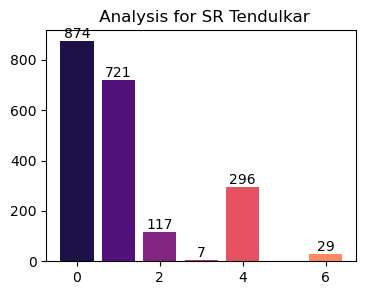

SR Tendulkar Total Runs In IPL History: 2334
Batsman SR Tendulkar : Performance against Top 10 Bowlers


,bowler,sum,mean
51,I Sharma,83,1.20
95,R Vinay Kumar,81,1.33
56,JA Morkel,73,1.46
87,PP Chawla,61,1.13
108,SB Jakati,60,1.22
...,...,...,...
110,SC Ganguly,1,1.00
60,JE Taylor,0,0.00
36,D du Preez,0,0.00
15,AD Mascarenhas,0,0.00


In [291]:
get_player_performance_stats('SR Tendulkar')

In [281]:
all_batsman=df_delivers['batter'].unique()
print('done')

done


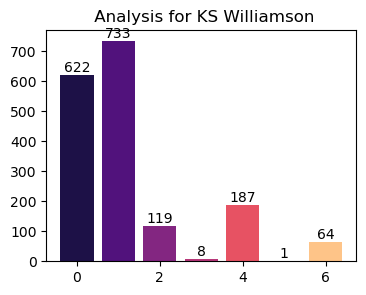

KS Williamson Total Runs In IPL History: 2132
Batsman KS Williamson : Performance against Top 10 Bowlers


,bowler,sum,mean
0,A Mishra,96,1.32
117,UT Yadav,83,1.41
8,AR Patel,63,1.15
27,DL Chahar,63,1.29
94,RA Jadeja,61,1.17
...,...,...,...
9,AS Rajpoot,0,0.00
56,KK Ahmed,0,0.00
46,JL Pattinson,0,0.00
69,MG Johnson,0,0.00


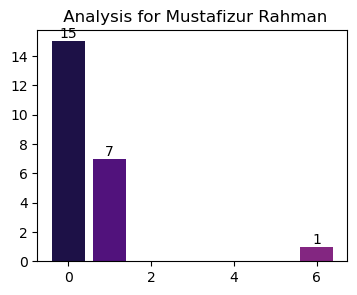

Mustafizur Rahman Total Runs In IPL History: 13
Batsman Mustafizur Rahman : Performance against Top 10 Bowlers


,bowler,sum,mean
8,TA Boult,7,1.17
0,Basil Thampi,1,0.33
1,HH Pandya,1,0.50
3,NM Coulter-Nile,1,1.00
2,Mohammed Shami,1,0.50
4,R Tewatia,1,1.00
5,RP Meredith,1,1.00
6,SN Thakur,0,0.00
7,SP Narine,0,0.00


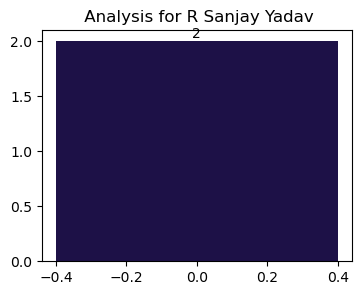

R Sanjay Yadav Total Runs In IPL History: 0
Batsman R Sanjay Yadav : Performance against Top 10 Bowlers


,bowler,sum,mean
0,B Kumar,0,0.00


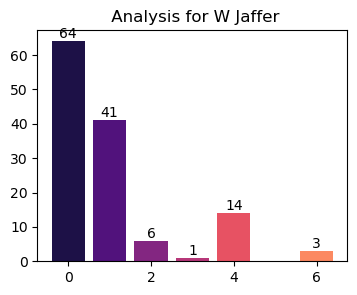

W Jaffer Total Runs In IPL History: 130
Batsman W Jaffer : Performance against Top 10 Bowlers


,bowler,sum,mean
13,P Amarnath,17,2.43
11,MS Gony,12,1.50
15,RP Singh,12,1.20
7,JA Morkel,10,1.11
4,DP Vijaykumar,10,1.11
19,Shahid Afridi,10,1.43
9,Joginder Sharma,8,2.67
12,Mohammad Asif,7,2.33
10,M Morkel,7,1.17
18,SB Styris,7,0.88


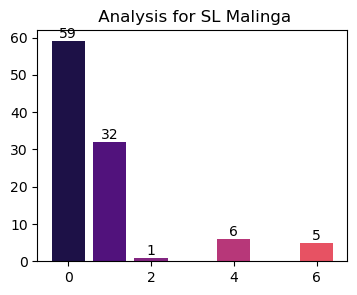

SL Malinga Total Runs In IPL History: 88
Batsman SL Malinga : Performance against Top 10 Bowlers


,bowler,sum,mean
1,AB Dinda,14,1.40
11,JA Morkel,8,2.00
23,UT Yadav,7,1.00
22,SP Narine,7,2.33
21,SN Thakur,7,3.50
10,J Syed Mohammad,6,1.50
4,BW Hilfenhaus,6,0.86
2,AD Mathews,5,1.25
25,WD Parnell,5,0.56
12,JP Faulkner,5,0.62


In [294]:
import random 
for i in random.choices(all_batsman, k=5):
    get_player_performance_stats(i)


In [285]:
# data frame JOIN
